In [2]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from scipy.signal import correlate

In [3]:
sampling_rate = 440 #in Hz 
time_length = 1 #  second
dt = 1/sampling_rate # sampling frequency
N = int(sampling_rate*time_length) # sample number

In [4]:
x0= 0 + 0j
f0= 440
f1= 220
ff= N #周波数をN回シフトさせる。n回目のシフト量は、dt*n*π*/2 これにラグがかかる
t = np.arange(0, time_length, dt)
df = np.arange(-440,440,1)

mat = np.zeros((ff,len(t)*2-1), dtype=complex) #ここに（周波数シフト、ラグ）のマトリックスを格納する

#その他配列の宣言
#que= np.zeros((len(t)), dtype=complex)
#y0 = np.zeros((len(t)), dtype=complex)
#y1 = np.zeros((len(t)), dtype=complex)
#y01 = np.zeros((len(t)), dtype=complex)
#Amp = np.zeros((ff,len(t)), dtype=float)
que= np.zeros((len(df)), dtype=complex)
y0 = np.zeros((len(df)), dtype=complex)
y1 = np.zeros((len(df)), dtype=complex)
y11 = np.zeros((len(df)), dtype=complex)
y01 = np.zeros((len(df)), dtype=complex)
Amp = np.zeros((ff,len(df)), dtype=float)
print(len(t))
#print(df)

440


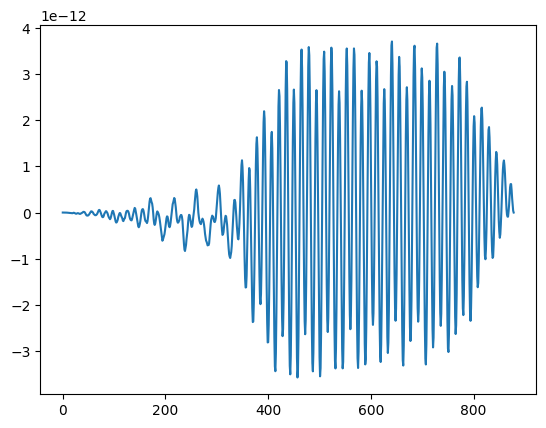

In [ ]:
#時系列だけ配列にして、Δfを一定にして図を描いてみる
ddf=0
f0=440
f1=420


#y0=np.exp(2j*np.pi*f0*t) #時系列データS1
#y1=np.exp(2j*np.pi*f1*t) #時系列データS2　周波数がS1とは異なる

y0 = np.sin(2*np.pi*f0*t)
y1=  np.sin(2*np.pi*f1*t)

y11 = y1 * np.exp(1j * (f0-f1) * np.pi * t)

#ただの相互相関、ただしy1にexp(jΔfπt)がかかっている

que0 = correlate(y0, y11, mode='full')
xx=[440,440]
yy=[-15,15]
plt.plot(que0)
#plt.plot(xx,yy)
#plt.xlim([400,460])


In [ ]:


for ddf in range(880):
    #print(ddf)
    y0=np.exp(2j*np.pi*f0*t) #時系列データS1
    y1=np.exp(2j*np.pi*f1*t) #時系列データS2　周波数がS1とは異なる
    
    y11 = y1 * np.exp(1j * (ddf-440) * np.pi * t) #ddf-440は周波数　これも時系列データ
    
    #y01 = y0 * y1 * np.exp(2j*ddf*np.pi*t)

    que0 = correlate(y0, y11, mode='full')

    mat[ddf:] = que0[:]

#print(ddf)    

(440, 879)


/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/isoda/work/mdapper/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


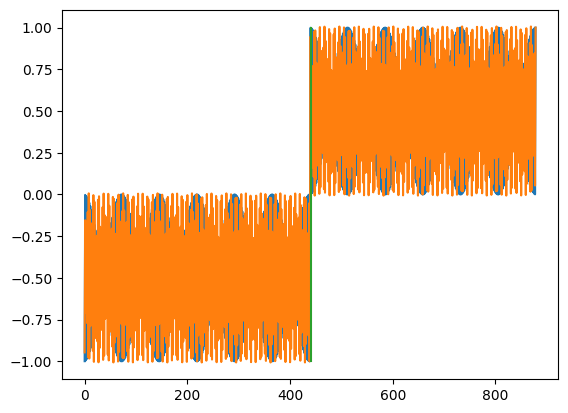

In [15]:
#試しに100Hzずれたところの、横軸ラグ、縦軸相互相関を書いてみる。
print(mat.shape)
plt.plot(mat[10,:])
plt.plot(mat[50,:])
xx=[440,440]
yy=[-1,1]
plt.plot(xx,yy)
plt.show()

Text(0, 0.5, 'df')

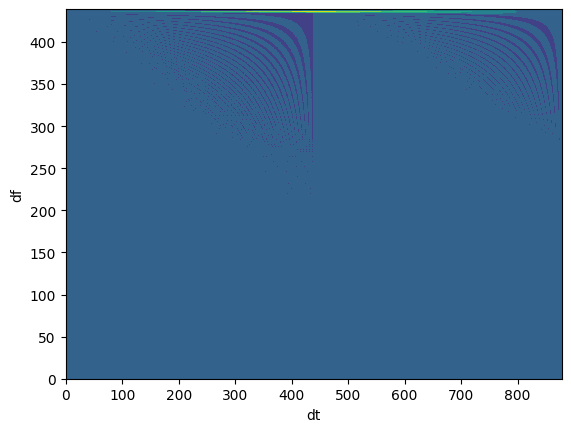

In [13]:
plt.contourf(((mat)))
plt.xlabel("dt")
plt.ylabel("df")